In [4]:
# Conversion of code from TensorFlow to PyTorch

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import joblib
from torch.utils.data import Dataset, DataLoader
import time

In [61]:
# Preset parameters
RANDOM_SEED = 42
VALIDATE_SIZE = 0.2

In [62]:
# Setting random seeds to ensure reproducibility
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

In [162]:
# Define patients and their corresponding files
patients = {
    1: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data1a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data1b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data1c.csv'],
    2: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data2a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data2b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data2c.csv'],
    3: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data3a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data3b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data3c.csv'],
    4: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data4a.csv', 
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data4b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data4c.csv'],    
    5: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data5a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data5b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data5c.csv'],
    6: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data6a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data6b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data6c.csv'],
    7: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data7.csv'],    
    8: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data8a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data8b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data8c.csv'],
    9: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data9a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data9b.csv'],
    10: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data10a.csv',
         '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data10b.csv',
         '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data10c.csv'],
    11: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data11.csv'],  
    12: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data12a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data12b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data12c.csv']   
}

In [ ]:
# # Load, merge, and sample data for each patient
# training_dfs = []
# testing_dfs = []
# i=0
# for patient_id, file_paths in patients.items():
#     # Load all three CSV files for the patient and drop the "Time" column
#     if i < 5:
#         patient_data = pd.concat([pd.read_csv(file).drop(columns=['Time'], errors='ignore') for file in file_paths])
#         training_dfs.append(patient_data)
#         i+=1
#     else:
#         patient_data = pd.concat([pd.read_csv(file).drop(columns=['Time'], errors='ignore') for file in file_paths])
#         testing_dfs.append(patient_data)
    
# train_full=pd.concat(training_dfs, ignore_index=True)
# test_full=pd.concat(testing_dfs, ignore_index=True)

In [ ]:
# Split 1:
# Training : 5 healthy patients
# Testing : 1 healthy patient + 6 unhealthy patient

# import random
# import pandas as pd

# training_dfs = []
# testing_dfs = []

# first_six_ids = list(patients.keys())[:6]
# training_ids = set(random.sample(first_six_ids, 5))

# for patient_id, file_paths in patients.items():
#     # Load all three CSV files for the patient and drop the "Time" column
#     patient_data = pd.concat([pd.read_csv(file).drop(columns=['Time'], errors='ignore') for file in file_paths])
    
#     if patient_id in training_ids:
#         training_dfs.append(patient_data)
#     else:
#         testing_dfs.append(patient_data)

# train_full = pd.concat(training_dfs, ignore_index=True)
# test_full = pd.concat(testing_dfs, ignore_index=True)

In [ ]:
# print(training_ids)

{1, 3, 4, 5, 6}


In [ ]:
# print(f"Training data samples: {len(training_dfs)}")
# print(f"Testing data samples: {len(testing_dfs)}")

Training data samples: 5
Testing data samples: 7


In [ ]:
# Split 2:
# Training : 5 healthy patients 
# Validation : 1 healthy patient 

# import random
# import pandas as pd

# training_dfs = []
# testing_dfs = []

# first_six_ids = list(patients.keys())[:6]
# training_ids = set(random.sample(first_six_ids, 5))

# for patient_id, file_paths in patients.items():
#     # Load all three CSV files for the patient and drop the "Time" column
#     patient_data = pd.concat([pd.read_csv(file).drop(columns=['Time'], errors='ignore') for file in file_paths])
    
#     if patient_id in training_ids:
#         training_dfs.append(patient_data)
#     if patient_id not in training_ids and patient_id in first_six_ids:
#         testing_dfs.append(patient_data)

# train_full = pd.concat(training_dfs, ignore_index=True)
# # test_full = pd.concat(testing_dfs, ignore_index=True)
# test_full = pd.concat(testing_dfs, ignore_index=True)

In [ ]:
# print(training_ids)

{1, 2, 3, 5, 6}


In [ ]:
# print(f"Training data samples: {len(training_dfs)}")
# print(f"Testing data samples: {len(testing_dfs)}")

Training data samples: 5
Testing data samples: 1


In [112]:
training_dfs = []
testing_dfs = []

first_six_ids = [1, 2, 3, 4, 5, 6]
training_ids = [1,2,3,4,5]  

for patient_id, file_paths in patients.items():
    # Load all three CSV files for the patient and drop the "Time" column
    patient_data = pd.concat([pd.read_csv(file).drop(columns=['Time'], errors='ignore') for file in file_paths])
    
    if patient_id in training_ids:
        training_dfs.append(patient_data)
    if patient_id not in training_ids and patient_id in first_six_ids:
        testing_dfs.append(patient_data)

train_full = pd.concat(training_dfs, ignore_index=True)
test_full = pd.concat(testing_dfs, ignore_index=True)

In [113]:
print(f"Training data samples: {len(training_dfs)}")
print(f"Testing data samples: {len(testing_dfs)}")

Training data samples: 5
Testing data samples: 1


In [114]:
len(test_full)

4800000

In [10]:
# full_dataset = pd.concat(sampled_dfs)# Concatenate all sampled dataframes into a single dataframe


In [11]:
# # Shuffle the data
# shuffled_dataset = full_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
# # Split into training (80%) and validation (20%)
# train_df, val_df = train_test_split(shuffled_dataset, test_size=0.2, random_state=42)

In [13]:
# Save the splits
train_full.to_csv('training_data.csv', index=False)
test_full.to_csv('validation_data.csv', index=False)

# # Print summary
# print(f"Total dataset size: {len(train_full)} cells")
print(f"Training set size: {len(train_full)} cells")
print(f"Validation set size: {len(test_full)} cells")

Training set size: 23448575 cells
Validation set size: 24427497 cells


In [ ]:
# configure our pipeline
pipeline = Pipeline([('scaler', MinMaxScaler())])

pipeline.fit(train_full)

Pipeline(steps=[('scaler', MinMaxScaler())])

In [15]:
# Assuming you have already fit your pipeline on data
# pipeline.fit(X_train, y_train)

In [11]:
# Save the pipeline to a file
joblib.dump(pipeline, 'April_pipeline.pkl')

['April_pipeline.pkl']

In [17]:
# Now you can use this pipeline to transform new data or make predictions
# Load the pipeline from file
#pipeline = joblib.load('pipeline.pkl')

In [116]:
# transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(train_full)
X_validate_transformed = pipeline.transform(test_full)

In [89]:
# data dimensions // hyperparameters 
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

In [69]:
print(input_dim)

14


In [70]:
class CustomDataset(Dataset):
    def __init__(self,dataset):
        self.dataset = torch.tensor(dataset, dtype=torch.float32)
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        return self.dataset[idx]

In [117]:
train_dataset = CustomDataset(X_train_transformed)
val_dataset = CustomDataset(X_validate_transformed)

In [118]:
train_loader = DataLoader(train_dataset, BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, BATCH_SIZE, shuffle=False)

In [5]:
class AutoEncoder(nn.Module):
    def __init__(self,input_dim,latent_dim=2):
        super().__init__()
        # Defining the Encoder
        self.encoder=nn.Sequential(
            # Input_dim -> 16 -> 8 -> 4 -> 2
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            # nn.Linear(4, 2),
            # nn.ELU()
        )

        
        # Defining the Decoder
        self.decoder = nn.Sequential(
            # 2 -> 4 -> 8 -> 16 -> Input_dim
            # nn.Linear(2, 4),
            # nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU(),
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# class Var_AutoEncoder(nn.Module):
#     def __init__(self,input_dim,latent_dim=4):
#         super().__init__()
#         # Defining the Encoder
#         self.encoder=nn.Sequential(
#             # Input_dim -> 16 -> 8 -> 4 -> 2
#             nn.Linear(input_dim, 16),
#             nn.ELU(),
#             nn.Linear(16, 8),
#             nn.ELU(),
#             nn.Linear(8, 4),
#             nn.ELU(),
#             # nn.Linear(4, 2),
#             # nn.ELU()
#         )
        
#         self.fc_mu = nn.Linear(4, latent_dim)
#         self.fc_logvar = nn.Linear(4, latent_dim)

        
#         # Defining the Decoder
#         self.decoder = nn.Sequential(
#             # 2 -> 4 -> 8 -> 16 -> Input_dim
#             # nn.Linear(2, 4),
#             # nn.ELU(),
#             nn.Linear(4, 8),
#             nn.ELU(),
#             nn.Linear(8, 16),
#             nn.ELU(),
#             nn.Linear(16, input_dim),
#             nn.ELU(),
#         )
    
#     def reparameterize(self, mu, logvar):
#         std = torch.exp(0.5 * logvar)
#         eps = torch.randn_like(std)
#         return mu + eps * std

#     def forward(self, x):
#         h = self.encoder(x)
#         mu = self.fc_mu(h)
#         logvar = self.fc_logvar(h)
#         z = self.reparameterize(mu, logvar)
#         reconstructed = self.decoder(z)
#         return reconstructed, mu, logvar

In [6]:
autoencoder= AutoEncoder(input_dim=input_dim)

NameError: name 'input_dim' is not defined

In [172]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

In [173]:
# Print model summary
print(autoencoder)
# print(f"Total parameters: {sum(p.numel() for p in autoencoder.parameters())}")

Var_AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=14, out_features=16, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): ELU(alpha=1.0)
  )
  (fc_mu): Linear(in_features=4, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=4, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=16, out_features=14, bias=True)
    (5): ELU(alpha=1.0)
  )
)


In [174]:
def train_autoencoder(model, train_loader, val_loader, epochs=100, lr=0.001):
    
    # Setup
    device = torch.device('cpu')
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Training trackers
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience = 15
    patience_counter = 0
    
    print(f"Training autoencoder for {epochs} epochs...")
    print("-" * 50)
    
    for epoch in range(epochs):
        start_time = time.time()
        
        # Training
        model.train()
        train_loss = 0.0
        for batch_data in train_loader:
            batch_data = batch_data.to(device)
            
            optimizer.zero_grad()
            reconstructed = model(batch_data)
            loss = criterion(reconstructed, batch_data)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_data in val_loader:
                batch_data = batch_data.to(device)
                reconstructed = model(batch_data)
                loss = criterion(reconstructed, batch_data)
                val_loss += loss.item()
        
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            best_model = model.state_dict().copy()
        else:
            patience_counter += 1
        
        # Print progress
        epoch_time = time.time() - start_time
        print(f"Epoch {epoch+1:3d}/{epochs} | Train: {avg_train_loss:.6f} | "
              f"Val: {avg_val_loss:.6f} | Time: {epoch_time:.1f}s | "
              f"Patience: {patience_counter}/{patience}")
        
        # Stop if patience exceeded
        if patience_counter >= patience:
            print(f"\nEarly stopping at epoch {epoch+1}")
            print(f"Best validation loss: {best_val_loss:.6f}")
            model.load_state_dict(best_model)
            break
    
    print("Training completed!")
    return model, train_losses, val_losses

# Usage
def run_training():
    # Initialize model
    autoencoder = AutoEncoder(input_dim=input_dim)
    print(f"Model created with {sum(p.numel() for p in autoencoder.parameters())} parameters")
    
    # Train
    trained_model, train_history, val_history = train_autoencoder(
        model=autoencoder,
        train_loader=train_loader,
        val_loader=val_loader,
        epochs=EPOCHS,
        lr=0.001
    ) 
    
    return trained_model, train_history, val_history

# Run training
if __name__ == "__main__":
    trained_model, train_losses, val_losses = run_training()

Model created with 834 parameters
Training autoencoder for 100 epochs...
--------------------------------------------------
Epoch   1/100 | Train: 0.002456 | Val: 0.001803 | Time: 65.4s | Patience: 0/15
Epoch   2/100 | Train: 0.002060 | Val: 0.001768 | Time: 59.9s | Patience: 0/15
Epoch   3/100 | Train: 0.001997 | Val: 0.001706 | Time: 59.5s | Patience: 0/15
Epoch   4/100 | Train: 0.001960 | Val: 0.001709 | Time: 76.7s | Patience: 1/15
Epoch   5/100 | Train: 0.001935 | Val: 0.001696 | Time: 84.4s | Patience: 0/15
Epoch   6/100 | Train: 0.001917 | Val: 0.001768 | Time: 160.7s | Patience: 1/15
Epoch   7/100 | Train: 0.001890 | Val: 0.001688 | Time: 77.2s | Patience: 0/15
Epoch   8/100 | Train: 0.001867 | Val: 0.001703 | Time: 69.8s | Patience: 1/15
Epoch   9/100 | Train: 0.001846 | Val: 0.001697 | Time: 69.8s | Patience: 2/15
Epoch  10/100 | Train: 0.001825 | Val: 0.001693 | Time: 71.5s | Patience: 3/15
Epoch  11/100 | Train: 0.001808 | Val: 0.001729 | Time: 75.5s | Patience: 4/15
Epoch 

KeyboardInterrupt: 

In [ ]:
# def vae_loss_function(reconstructed, original, mu, logvar, beta=1.0):
#     """
#     VAE Loss = MSE + beta * KL Divergence
#     """
#     mse_loss = nn.functional.mse_loss(reconstructed, original, reduction='sum')
#     kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return mse_loss + beta * kl_div

In [ ]:
# def train_vae(model, train_loader, val_loader, epochs=100, lr=0.001, beta=1.0):
#     import time
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model.to(device)

#     optimizer = optim.Adam(model.parameters(), lr=lr)
    
#     train_losses, val_losses = [], []
#     best_val_loss = float('inf')
#     patience, patience_counter = 15, 0

#     print(f"Training VAE for {epochs} epochs...")
#     print("-" * 50)

#     for epoch in range(epochs):
#         start_time = time.time()
#         model.train()
#         train_loss = 0.0

#         for batch_data in train_loader:
#             batch_data = batch_data.to(device)
#             optimizer.zero_grad()
#             reconstructed, mu, logvar = model(batch_data)
#             loss = vae_loss_function(reconstructed, batch_data, mu, logvar, beta)
#             loss.backward()
#             optimizer.step()
#             train_loss += loss.item()

#         avg_train_loss = train_loss / len(train_loader)
#         train_losses.append(avg_train_loss)

#         # Validation
#         model.eval()
#         val_loss = 0.0
#         with torch.no_grad():
#             for batch_data in val_loader:
#                 batch_data = batch_data.to(device)
#                 reconstructed, mu, logvar = model(batch_data)
#                 loss = vae_loss_function(reconstructed, batch_data, mu, logvar, beta)
#                 val_loss += loss.item()

#         avg_val_loss = val_loss / len(val_loader)
#         val_losses.append(avg_val_loss)

#         # Early stopping
#         if avg_val_loss < best_val_loss:
#             best_val_loss = avg_val_loss
#             patience_counter = 0
#             best_model = model.state_dict().copy()
#         else:
#             patience_counter += 1

#         epoch_time = time.time() - start_time
#         print(f"Epoch {epoch+1:3d}/{epochs} | Train: {avg_train_loss:.6f} | "
#               f"Val: {avg_val_loss:.6f} | Time: {epoch_time:.1f}s | "
#               f"Patience: {patience_counter}/{patience}")

#         if patience_counter >= patience:
#             print(f"\nEarly stopping at epoch {epoch+1}")
#             print(f"Best validation loss: {best_val_loss:.6f}")
#             model.load_state_dict(best_model)
#             break

#     print("Training completed!")
#     return model, train_losses, val_losses

# def run_training():
#     vae = Var_AutoEncoder(input_dim=input_dim)
#     print(f"Model created with {sum(p.numel() for p in vae.parameters())} parameters")
    
#     trained_model, train_history, val_history = train_vae(
#         model=vae,
#         train_loader=train_loader,
#         val_loader=val_loader,
#         epochs=EPOCHS,
#         lr=0.001,
#         beta=1.0  # try adjusting if needed
#     )
#     return trained_model, train_history, val_history

# if __name__ == "__main__":
#     trained_model, train_losses, val_losses = run_training()


Model created with 874 parameters
Training VAE for 100 epochs...
--------------------------------------------------
Epoch   1/100 | Train: 57.551149 | Val: 56.234804 | Time: 78.7s | Patience: 0/15
Epoch   2/100 | Train: 57.271176 | Val: 56.605083 | Time: 110.1s | Patience: 1/15
Epoch   3/100 | Train: 57.264515 | Val: 56.668844 | Time: 82.6s | Patience: 2/15
Epoch   4/100 | Train: 57.261452 | Val: 56.326011 | Time: 96.4s | Patience: 3/15
Epoch   5/100 | Train: 57.261441 | Val: 56.050146 | Time: 98.7s | Patience: 0/15
Epoch   6/100 | Train: 57.261462 | Val: 56.170652 | Time: 94.3s | Patience: 1/15
Epoch   7/100 | Train: 57.261451 | Val: 56.466073 | Time: 100.0s | Patience: 2/15
Epoch   8/100 | Train: 57.261485 | Val: 56.090403 | Time: 92.4s | Patience: 3/15
Epoch   9/100 | Train: 57.261460 | Val: 56.495337 | Time: 90.8s | Patience: 4/15
Epoch  10/100 | Train: 57.261546 | Val: 56.517905 | Time: 99.6s | Patience: 5/15
Epoch  11/100 | Train: 57.261530 | Val: 55.849523 | Time: 100.8s | Patie

In [187]:
print(val_losses)

[56.23480357564291, 56.605083162638344, 56.668844247436525, 56.32601110209147, 56.050145954589844, 56.17065241760254, 56.46607338724772, 56.09040340637207, 56.49533712341309, 56.51790496785482, 55.84952262776693, 56.00436241699219, 56.2263526365153, 56.08906923116048, 56.77006789754232, 56.46940072224935, 56.64175782063802, 56.57943565205892, 55.91360615600586, 56.76517719970703, 56.5649850390625, 56.273154201253256, 56.08582905802409, 56.69529984965006, 55.42713797627767, 56.47121505472819, 55.60852111572266, 56.97180229939779, 56.21638835367838, 56.29909125203451, 56.080018266194664, 56.31412007242839, 55.65805122395833, 56.70528441630046, 56.597837065836586, 56.6054274987793, 56.293848002319336, 56.427643423461916, 56.809996627400714, 55.88073922892253]


In [181]:
torch.save(trained_model.state_dict(), 'model_weights_vae.pth')

In [ ]:
# Variational Autoencoder training summary
# Early stopping at epoch 40
# Best validation loss: 55.427138

In [ ]:
val_loss=[0.001864,0.001826,0.001690,0.0023,0.001759,0.001661]
es_data=[100,58,87,100,100,76]

In [ ]:
# torch.save(trained_model.state_dict(), 'model_weights.pth')

In [ ]:
# model = Var_AutoEncoder(14)
# model.load_state_dict(torch.load('model_weights_vae.pth'))
# model.eval()  # Set to evaluation mode if you're done training


Var_AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=14, out_features=16, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): ELU(alpha=1.0)
  )
  (fc_mu): Linear(in_features=4, out_features=4, bias=True)
  (fc_logvar): Linear(in_features=4, out_features=4, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=16, out_features=14, bias=True)
    (5): ELU(alpha=1.0)
  )
)

In [ ]:
def test_autoencoder_on_patient(patient_id, model, pipeline, patients_dict):
    # Load and concatenate all files for the patient
    file_paths = patients_dict[patient_id]
    patient_df = pd.concat([pd.read_csv(fp).drop(columns=['Time'], errors='ignore') for fp in file_paths], ignore_index=True)
    
    # Transform using the fitted pipeline
    patient_data_transformed = pipeline.transform(patient_df)
    
    # Convert to torch tensor
    patient_tensor = torch.tensor(patient_data_transformed, dtype=torch.float32)
    
    # Set model to eval mode
    model.eval()
    with torch.no_grad():
        reconstructed, _, _ = model(patient_tensor)
        reconstructed = reconstructed.numpy()
    
    # Compute MSE per sample
    mse = np.mean((patient_data_transformed - reconstructed) ** 2, axis=1)
    return mse


In [220]:
pt1 = test_autoencoder_on_patient(7, model, pipeline, patients)
print(pt1)

[0.0056043  0.03851005 0.03548738 ... 0.00579867 0.02407112 0.03799457]


In [ ]:
# Split 1:
# Validation loss with last layer size 4 : 0.002788(32 epochs early stopping) 
# Validation loss with last layer size 2 : 0.004675(44 epochs early stopping)



# Split 2:
# Validation loss with last layer size 2 : 0.004106 (50 epochs early stopping)
# Validation loss with last layer size 4 : 0.002398 

In [ ]:
# print(sorted(val_losses))

[0.004674683431860019, 0.004684782382116925, 0.00469373362841117, 0.004695362903038557, 0.004704248259910129, 0.004705207237580081, 0.0047069082263466915, 0.0047108469865960465, 0.004721478466151934, 0.004722061356377529, 0.004726563275438774, 0.004727554408923862, 0.004728323023651987, 0.004729264443834435, 0.004731789243473819, 0.004736439444378368, 0.00473928111875705, 0.004740016887032665, 0.004754757746299926, 0.0047574612140336165, 0.0047576975938683486, 0.004762447838291539, 0.004774810663389101, 0.004776954491345262, 0.004778553976387381, 0.004784346291542778, 0.0047846762068258115, 0.004791186897571056, 0.004801769778790767, 0.004814112285269005, 0.00481815491107817, 0.004828826130649984, 0.004832681567422102, 0.004840048208016394, 0.004850969765254018, 0.004881642424467611, 0.004885203958352065, 0.00488819490352843, 0.004900068276785501, 0.004921042666780962, 0.00501737200984549, 0.005221584855186087, 0.0052586581601837025, 0.0054465185042930015]


In [ ]:
#      Predicted      Actual
# 7    3.58%          3.28%
# 8    0.80%          1.2%
# 9    10.10%         9.3%
# 10   2.80%          2.17%
# 11   13.67%         14.6%
# 12   2.86%          4.2%

In [201]:
import pandas as pd
import numpy as np

# # Load the file and extract the MSE column
# df = pd.read_csv('/content/fcs_data_8.csv')  # replace with your actual path
# mse_values = df['MSE'].values  # replace 'MSE' if your column is named differently

percent_unhealthy = 4.2
threshold_index = int((percent_unhealthy / 100) * len(pt1))
threshold_value = np.sort(pt1)[-threshold_index]

print(f"Threshold for top {percent_unhealthy}% reconstruction errors: {threshold_value:.5f}")

#change patient and percent values, once done for all unhealthy patients, take average to calculate threshold.


Threshold for top 4.2% reconstruction errors: 0.05883


In [214]:
import pandas as pd
import numpy as np

# # Load the CSV file
# df = pd.read_csv('/content/fcs_data_7.csv')  # or clean_all.csv
# mse_values = df['MSE'].values  # update column name if needed

# Set threshold
threshold = 0.05589

# Calculate percentage above threshold
num_above = np.sum(pt1 > threshold)
total = len(pt1)
percent_above = (num_above / total) * 100

print(f"{percent_above:.2f}% of cells have reconstruction error > {threshold}")

3.91% of cells have reconstruction error > 0.05589


In [ ]:
# Variational Autoencoder

# Patient 7 : 0.06050
# Patient 8 : 0.04864
# Patient 9 : 0.04542
# Patient 10 : 0.06536
# Patient 11 : 0.05658
# Patient 12 : 0.05883


# Average Threshold : 0.05589

# Patient 7 : 3.91%
# Patient 8 : 0.41%
# Patient 9 : 2.62%
# Patient 10 : 3.15%
# Patient 11 : 14.85%
# Patient 12 : 4.61%

In [ ]:
# With last layer size 4 and split 2 :

# Patient 9 : 0.01301
# Patient 8 : 0.00978
# Patient 7 : 0.01170
# Patient 10 : 0.01855
# Patient 11 : 0.00960
# Patient 12 : 0.00994


# Average Threshold : 0.012096

# Patient 7 : 2.92%
# Patient 8 : 0.78%
# Patient 9 : 9.78%
# Patient 10 : 2.8%
# Patient 11 : 10.48%
# Patient 12 : 2.9%

In [ ]:
# With last layer size 2 and split 2 :

# Patient 9 : 0.01742
# Patient 8 : 0.01505
# Patient 7 : 0.02000 
# Patient 10 : 0.01859
# Patient 11 : 0.01328
# Patient 12 : 0.01489


# Average Threshold : 0.0165383

# Patient 7 : 5.52%
# Patient 8 : 0.95%
# Patient 9 : 9.83%
# Patient 10 : 2.68%
# Patient 11 : 9.14%
# Patient 12 : 3.38%

In [ ]:
# After running on each combination: Best model is saved.

# Patient 7 : 0.01297
# Patient 8 : 0.00972
# Patient 9 : 0.01007
# Patient 10 : 0.01488
# Patient 11 : 0.01068
# Patient 12 : 0.01040


# Average Threshold : 0.011453

# Patient 7 : 4.08%
# Patient 8 : 0.80% 
# Patient 9 : 8.15%
# Patient 10 : 2.97%
# Patient 11 : 13.68%
# Patient 12 : 3.68%

In [138]:
print((0.01297+0.00972+0.01007+0.01488+0.01068+0.01040)/6)

0.011453333333333334


In [ ]:
# Early stopping at epoch 94
# Best validation loss: 0.002443

In [152]:
actual_percentages = [3.28, 1.2, 9.3, 2.17, 14.6, 4.2]
predicted_percentages2 = [5.52,0.95, 9.83, 2.68, 9.14, 3.38]
predicted_percentages4 = [2.92, 0.78, 9.78, 2.8, 10.48, 2.9]
predicted_percentages3 = [4.08, 0.80, 8.15, 2.97, 13.68, 3.68]

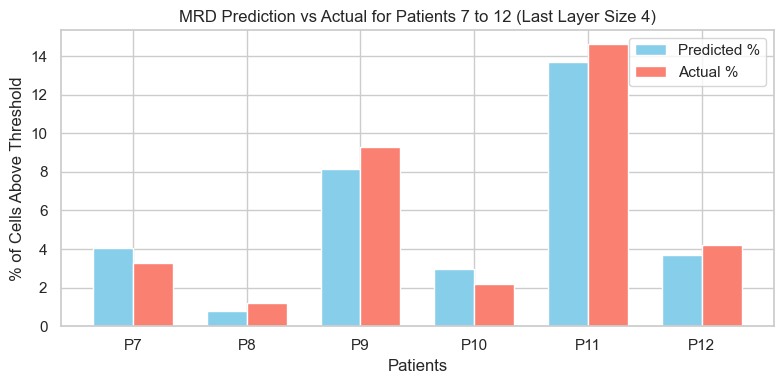

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Patient IDs
patients_ = ['P7', 'P8', 'P9', 'P10', 'P11', 'P12']

# # Predicted percentages by model
# predicted_percentages4 = [2.92, 0.78, 9.78, 2.8, 10.48, 2.9]

# Actual ground truth percentages
actual_percentages = [3.28, 1.2, 9.3, 2.17, 14.6, 4.2]

# Create a DataFrame for visualization
df_plot = pd.DataFrame({
    'Patient': patients_,
    'Predicted': predicted_percentages3,
    'Actual': actual_percentages
})

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Plot bars
bar_width = 0.35
x = np.arange(len(patients_))
plt.bar(x - bar_width/2, df_plot['Predicted'], bar_width, label='Predicted %', color='skyblue')
plt.bar(x + bar_width/2, df_plot['Actual'], bar_width, label='Actual %', color='salmon')

# Add labels and legend
plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('MRD Prediction vs Actual for Patients 7 to 12 (Last Layer Size 4)')
plt.xticks(ticks=x, labels=patients_)
plt.legend()
plt.tight_layout()
plt.show()

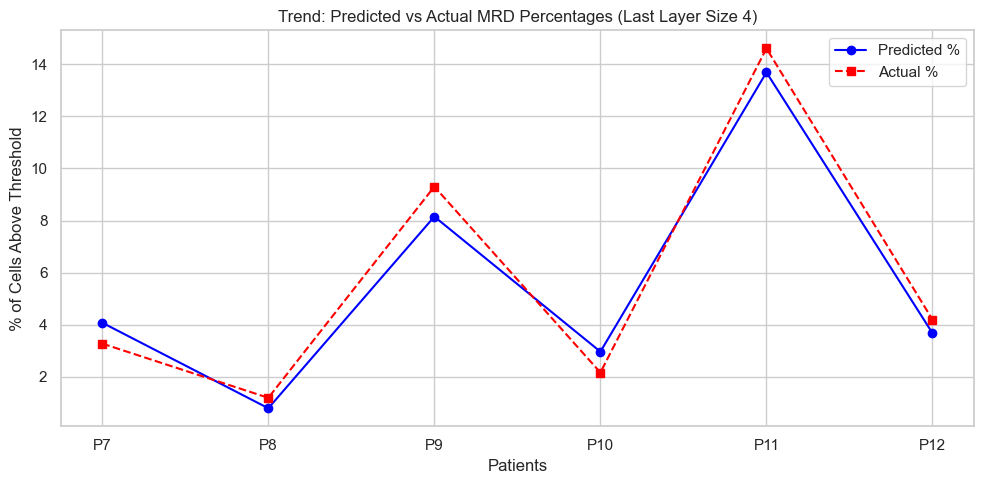

In [169]:
plt.figure(figsize=(10, 5))
plt.plot(patients_, predicted_percentages3, marker='o', label='Predicted %', linestyle='-', color='blue')
plt.plot(patients_, actual_percentages, marker='s', label='Actual %', linestyle='--', color='red')

plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('Trend: Predicted vs Actual MRD Percentages (Last Layer Size 4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

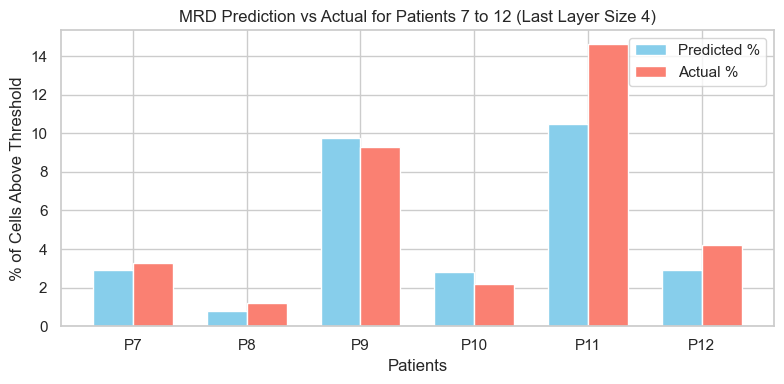

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Patient IDs
patients = ['P7', 'P8', 'P9', 'P10', 'P11', 'P12']

# Predicted percentages by model
predicted_percentages4 = [2.92, 0.78, 9.78, 2.8, 10.48, 2.9]

# Actual ground truth percentages
actual_percentages = [3.28, 1.2, 9.3, 2.17, 14.6, 4.2]

# Create a DataFrame for visualization
df_plot = pd.DataFrame({
    'Patient': patients,
    'Predicted': predicted_percentages4,
    'Actual': actual_percentages
})

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Plot bars
bar_width = 0.35
x = np.arange(len(patients))
plt.bar(x - bar_width/2, df_plot['Predicted'], bar_width, label='Predicted %', color='skyblue')
plt.bar(x + bar_width/2, df_plot['Actual'], bar_width, label='Actual %', color='salmon')

# Add labels and legend
plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('MRD Prediction vs Actual for Patients 7 to 12 (Last Layer Size 4)')
plt.xticks(ticks=x, labels=patients)
plt.legend()
plt.tight_layout()
plt.show()

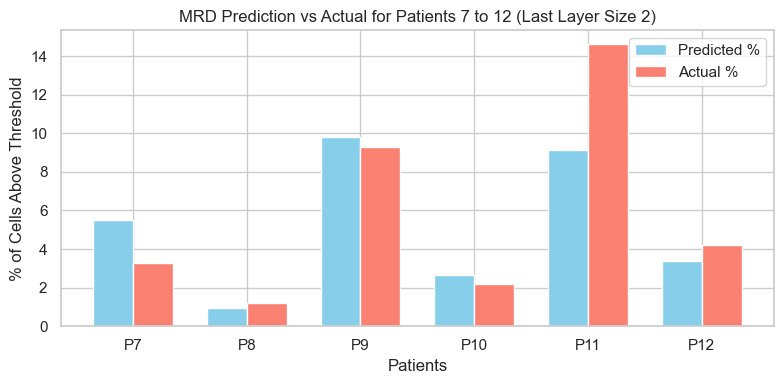

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Patient IDs
patients = ['P7', 'P8', 'P9', 'P10', 'P11', 'P12']

# Predicted percentages by model
predicted_percentages2 = [5.52,0.95, 9.83, 2.68, 9.14, 3.38]

# Actual ground truth percentages
actual_percentages = [3.28, 1.2, 9.3, 2.17, 14.6, 4.2]

# Create a DataFrame for visualization
df_plot = pd.DataFrame({
    'Patient': patients,
    'Predicted': predicted_percentages2,
    'Actual': actual_percentages
})

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Plot bars
bar_width = 0.35
x = np.arange(len(patients))
plt.bar(x - bar_width/2, df_plot['Predicted'], bar_width, label='Predicted %', color='skyblue')
plt.bar(x + bar_width/2, df_plot['Actual'], bar_width, label='Actual %', color='salmon')

# Add labels and legend
plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('MRD Prediction vs Actual for Patients 7 to 12 (Last Layer Size 2)')
plt.xticks(ticks=x, labels=patients)
plt.legend()
plt.tight_layout()
plt.show()

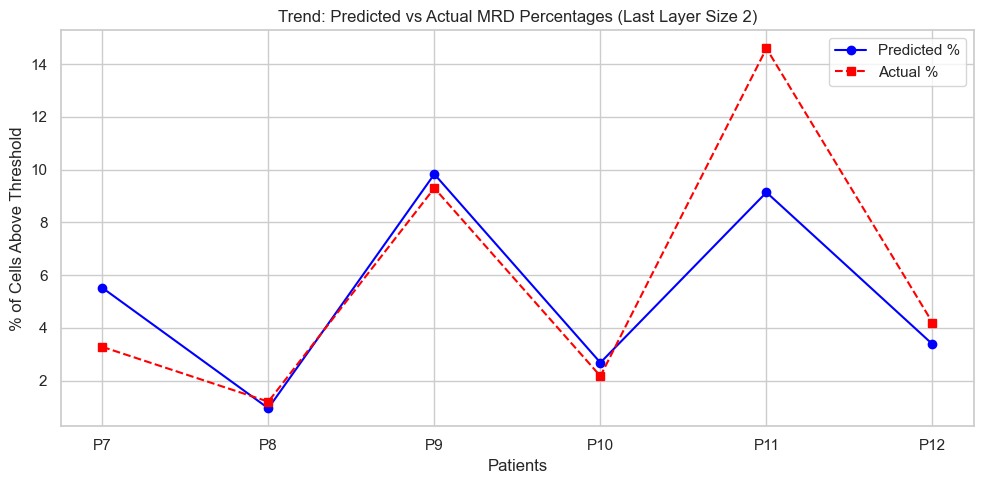

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(patients, predicted_percentages2, marker='o', label='Predicted %', linestyle='-', color='blue')
plt.plot(patients, actual_percentages, marker='s', label='Actual %', linestyle='--', color='red')

plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('Trend: Predicted vs Actual MRD Percentages (Last Layer Size 2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

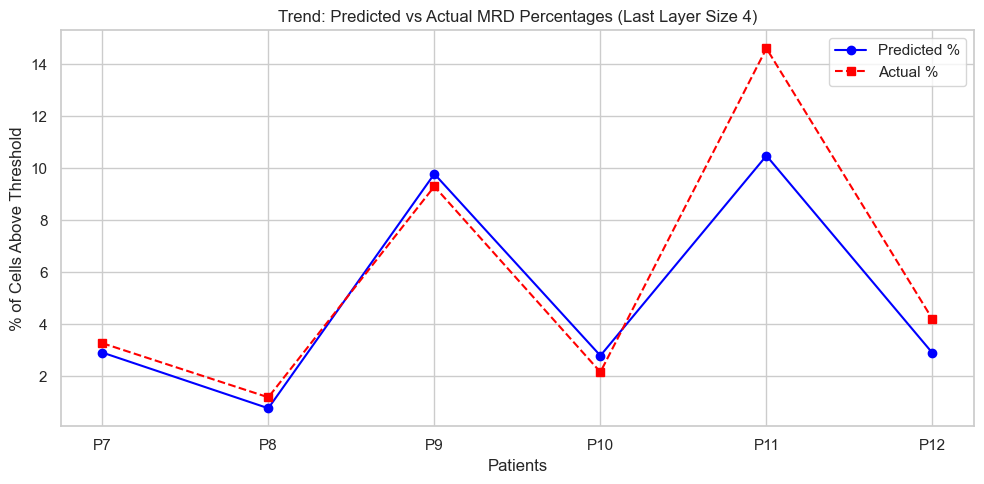

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(patients, predicted_percentages4, marker='o', label='Predicted %', linestyle='-', color='blue')
plt.plot(patients, actual_percentages, marker='s', label='Actual %', linestyle='--', color='red')

plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('Trend: Predicted vs Actual MRD Percentages (Last Layer Size 4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()